# GDP Assignment

# Part-I: GDP Analysis of the Indian States

## Part I-A

In [213]:
# Importing necessary libraries required for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [214]:
# Importing the data set
main_df = pd.read_csv("../GSDP_Assignment/Data_1/Data I-A.csv")

In [215]:
# Visualising the data
main_df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [216]:
# Making the deep copy of the data frame to avoid warnings during slicing and also filtering out 2016-2017 data
df_1 = main_df.loc[(main_df["Duration"] != "2016-17")].copy()
# Concatenating necessary information from two columns
df_1.insert(0, "index_column", df_1["Items  Description"].str.replace("\(% Growth over previous year\)", "% Growth") + " in " +df_1["Duration"])
# Renaming column names
df_1["index_column"] = df_1["index_column"].str.replace("\(` in Crore\)", "")
# Dropping columns as their necessary information is aggregated into another column
df_1.drop(["Items  Description", "Duration"], axis=1, inplace=True)
df_1 = df_1.set_index("index_column").T
df_1.head()

index_column,GSDP - CURRENT PRICES in 2011-12,GSDP - CURRENT PRICES in 2012-13,GSDP - CURRENT PRICES in 2013-14,GSDP - CURRENT PRICES in 2014-15,GSDP - CURRENT PRICES in 2015-16,% Growth in 2012-13,% Growth in 2013-14,% Growth in 2014-15,% Growth in 2015-16
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.41,16.38,14.79,12.07
Assam,143175.0,156864.0,177745.0,198098.0,224234.0,9.56,13.31,11.45,13.19
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.25,12.30,17.92,10.59
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.30,16.44,13.69,10.98


In [217]:
# Analysing the resultant data frame
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Andhra Pradesh  to All_India GDP
Data columns (total 9 columns):
GSDP - CURRENT PRICES  in 2011-12    33 non-null float64
GSDP - CURRENT PRICES  in 2012-13    33 non-null float64
GSDP - CURRENT PRICES  in 2013-14    33 non-null float64
GSDP - CURRENT PRICES  in 2014-15    33 non-null float64
GSDP - CURRENT PRICES  in 2015-16    24 non-null float64
% Growth in 2012-13                  33 non-null float64
% Growth in 2013-14                  33 non-null float64
% Growth in 2014-15                  33 non-null float64
% Growth in 2015-16                  24 non-null float64
dtypes: float64(9)
memory usage: 2.7+ KB


In [218]:
# Checking null values in rows across different rows/states
df_1.isnull().sum(axis=1)

Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             2
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  2
Manipur                      2
Meghalaya                    0
Mizoram                      2
Nagaland                     2
Odisha                       0
Punjab                       2
Rajasthan                    2
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      2
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 9
Andaman & Nicobar Islands    2
Chandigarh                   0
Delhi                        0
Puducher

In [219]:
# Not many null values present across states
# Calculating the average growth over 4 years and skipping NaN values
df_1["average_growth"] = df_1.loc[:,["% Growth in 2012-13", "% Growth in 2013-14", "% Growth in 2014-15", "% Growth in 2015-16"]].mean(axis=1)

In [220]:
# Filtering out All India GDP as comparision is across states
df_1 = df_1[df_1.index != "All_India GDP"]

In [221]:
# Describing the resulting data frame
df_1.describe()

index_column,GSDP - CURRENT PRICES in 2011-12,GSDP - CURRENT PRICES in 2012-13,GSDP - CURRENT PRICES in 2013-14,GSDP - CURRENT PRICES in 2014-15,GSDP - CURRENT PRICES in 2015-16,% Growth in 2012-13,% Growth in 2013-14,% Growth in 2014-15,% Growth in 2015-16,average_growth
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,2.300000e+01,32.000000,32.000000,32.00000,23.000000,32.000000
mean,2.531158e+05,2.880582e+05,3.270771e+05,3.639305e+05,4.213787e+05,12.472812,13.582812,11.43250,11.520870,12.390859
std,2.888333e+05,3.299940e+05,3.761824e+05,4.148911e+05,3.792662e+05,4.914207,4.992186,2.63896,2.334356,2.535129
min,3.979000e+03,4.421000e+03,5.159000e+03,5.721000e+03,1.663700e+04,-10.020000,-5.770000,4.70000,6.190000,2.020000
25%,1.909800e+04,2.164950e+04,2.432475e+04,2.698500e+04,8.169450e+04,11.580000,12.402500,10.13250,10.585000,11.927500
50%,1.544960e+05,1.761175e+05,1.976285e+05,2.260445e+05,3.418870e+05,13.375000,13.575000,11.16500,11.090000,12.602500
75%,3.605868e+05,4.039708e+05,4.552075e+05,5.148840e+05,5.819840e+05,14.327500,15.997500,13.06500,12.350000,13.120000
max,1.272967e+06,1.448466e+06,1.647506e+06,1.792122e+06,1.212668e+06,20.710000,23.100000,17.92000,17.910000,16.866667


In [222]:
df_1

index_column,GSDP - CURRENT PRICES in 2011-12,GSDP - CURRENT PRICES in 2012-13,GSDP - CURRENT PRICES in 2013-14,GSDP - CURRENT PRICES in 2014-15,GSDP - CURRENT PRICES in 2015-16,% Growth in 2012-13,% Growth in 2013-14,% Growth in 2014-15,% Growth in 2015-16,average_growth
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.43,12.85,13.40,15.85,12.632500
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.41,16.38,14.79,12.07,14.162500
Assam,143175.0,156864.0,177745.0,198098.0,224234.0,9.56,13.31,11.45,13.19,11.877500
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.25,12.30,17.92,10.59,13.765000
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.30,16.44,13.69,10.98,13.352500
Goa,42367.0,38120.0,35921.0,40633.0,45002.0,-10.02,-5.77,13.12,10.75,2.020000
Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,17.69,11.47,10.82,11.09,12.767500
Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,16.63,15.45,9.18,10.91,13.042500
Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN,13.89,14.42,10.14,NaN,12.816667
Jammu & Kashmir,78254.0,87105.0,95893.0,100404.0,118387.0,11.31,10.09,4.70,17.91,11.002500


In [223]:
# Sorting the data frame by average growth
df_1 = df_1.sort_values(by="average_growth", ascending=False)

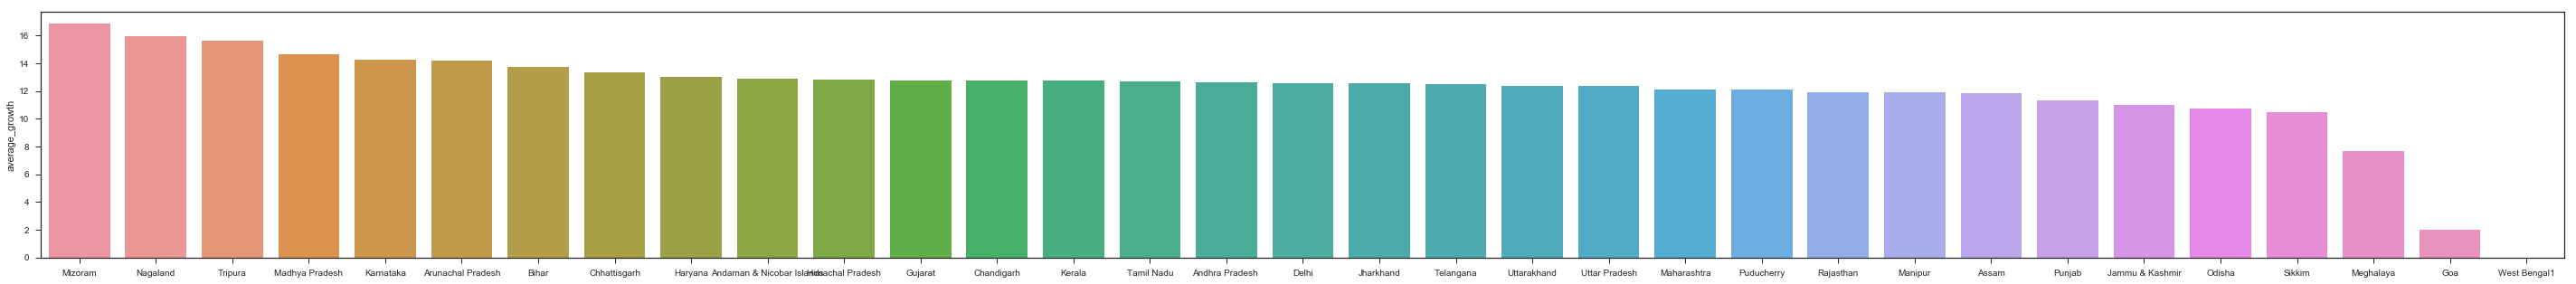

In [224]:
# Plotting the average growth across various years
plt.figure(figsize=(50,5))
sns.barplot(x=df_1.index, y="average_growth", data=df_1)

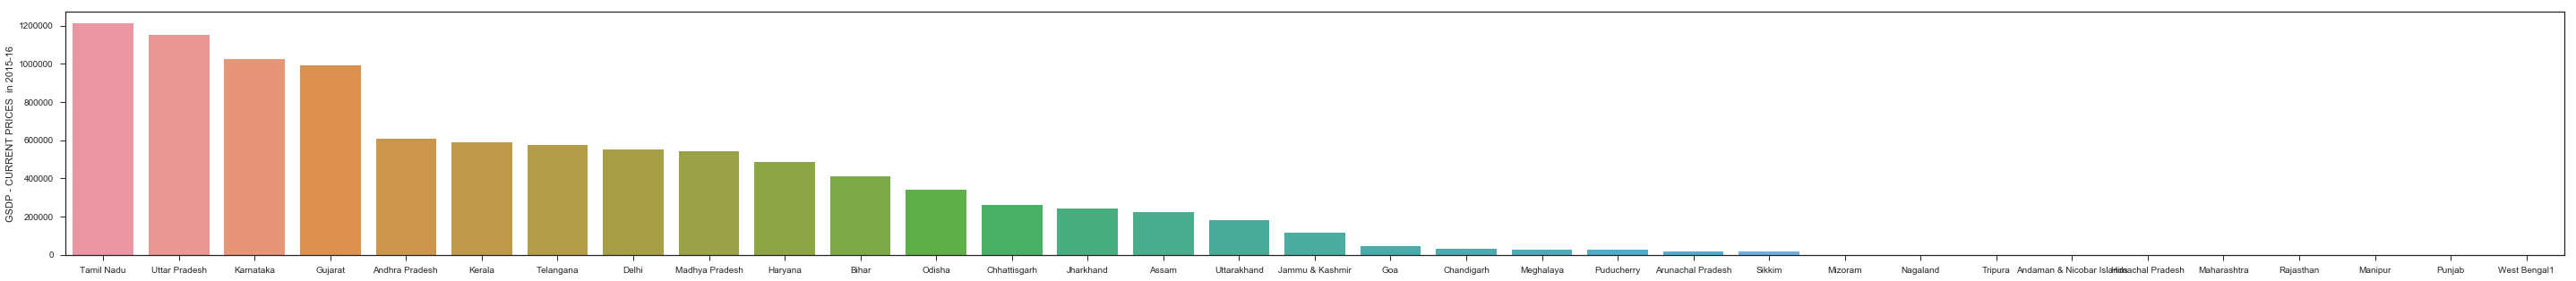

In [225]:
# Plotting the total GDP of the states for the year 2015-16:
df_2 = df_1.sort_values(by="GSDP - CURRENT PRICES  in 2015-16", ascending=False).copy()
plt.figure(figsize=(50,5))
sns.barplot(x=df_2.index, y="GSDP - CURRENT PRICES  in 2015-16", data=df_2)

## End of Part I-A

## Part I-B:

In [226]:
# Creating the data frame for further analysis
directory = '../GSDP_Assignment/Data_2/'
is_first_iteration=True
df_main=""

# Iterating over all csv files present in the directory
for filename in os.listdir(directory):
    # Filtering out UT csv files
    if filename not in ["NAD-Chandigarh-GSVA_cur_2015-16.csv", "NAD-Delhi-GSVA_cur_2016-17.csv", "NAD-Puducherry-GSVA_cur_2016-17.csv"]:
        state = filename[4 : filename[4:].index("-")+4]
        df_local = pd.read_csv(directory+filename)
        # If First iteration then fetch 3 columns into new data frame
        if is_first_iteration:
            # Analysis has to be done for 2014-2015
            df_local = df_local.loc[:, ["S.No.", "Item", "2014-15"]]
            # S.No. column contains "Total" values. Replacing it with "0" so that even if numeric operations be applied on data frame, it is not filtered out.
            df_local["S.No."] = df_local["S.No."].str.replace("Total", "0")
            # Appending the state name in one of the column
            df_local.columns = df_local.columns.str.replace("2014-15", state)
            # Making a deep copy to avoid issues during slicing operations
            df_main = pd.DataFrame(df_local.copy())
            is_first_iteration = False
        else:
            # Fetching just one column for all other iterations since other information is already present in data frame
            # Analysis has to be done for 2014-2015
            df_local = pd.DataFrame(df_local.loc[:, ["2014-15"]])
            df_local.columns = df_local.columns.str.replace("2014-15", state)
            # Concatenating data frame
            df_main = pd.concat([df_main, df_local], axis=1)

# All the sub-sub-sectors has "." in S.No. Hence excluding all such columns from data frame
df_main = df_main[df_main["S.No."].apply(lambda x : "." not in x)]
# Dropping S.No. column since it is no longer needed
df_main = df_main.drop("S.No.", axis=1)
# Setting the index of the new data frame
df_main.set_index("Item", inplace=True)
# Transposing for better analysis
df_main = df_main.T
df_main.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Andhra_Pradesh,14819416.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,10488884.0,4233400.0,5076984.0,1900863.0,4405409.0,2200897.0,4215389.0,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0
Arunachal_Pradesh,686117.0,30842.0,716959.0,26120.0,113527.0,147842.0,287489.0,60421.0,35203.0,25207.0,48418.0,243867.0,218728.0,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0
Assam,3855548.0,1471149.0,5326697.0,2002936.0,296587.0,1733568.0,4033091.0,2987155.0,1194568.0,543651.0,1412466.0,1373611.0,1795658.0,9307109.0,18666897.0,1725309.0,582406.0,19809800.0,326780.0,60621.0
Bihar,7951890.0,68107.0,8019997.0,2189965.0,345168.0,3449763.0,5984896.0,7448373.0,3147173.0,1178022.0,3740641.0,2078171.0,4587589.0,22179969.0,36184863.0,3213546.0,2006421.0,37391988.0,1101240.0,33954.0
Chhattisgarh,3948847.0,2451970.0,6400817.0,4370593.0,1198438.0,2669855.0,8238886.0,1535571.0,871770.0,739057.0,2462166.0,867982.0,1112232.0,7588778.0,22228481.0,2601791.0,1332092.0,23498180.0,270530.0,86860.0


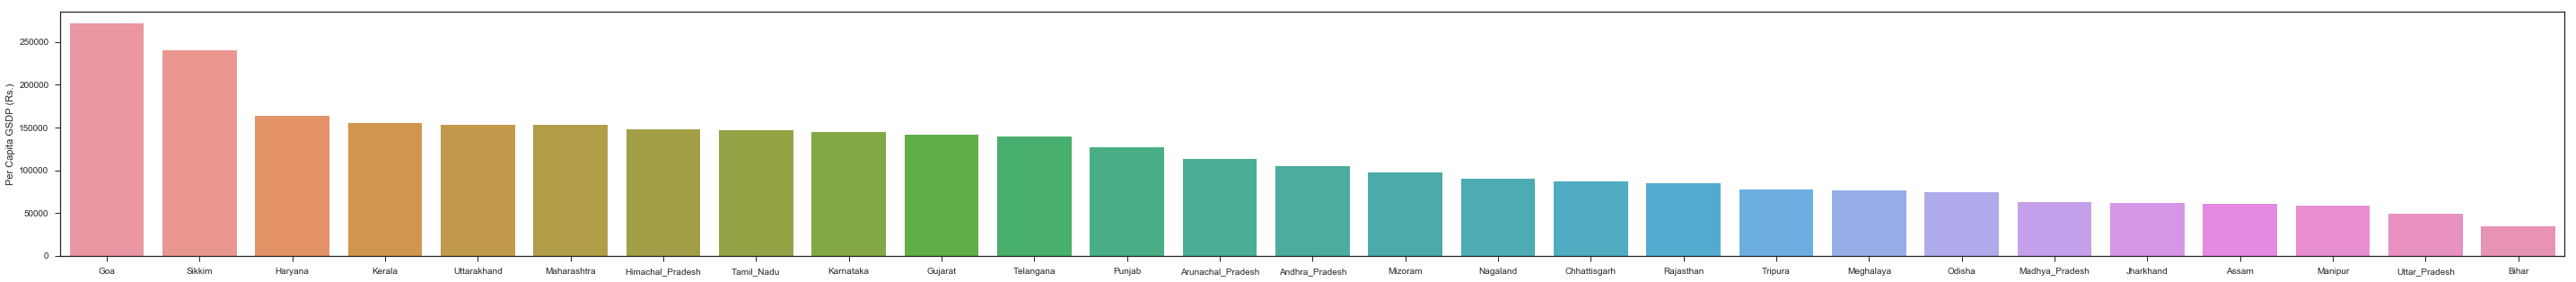

In [227]:
# Sorting the data on Per Capita GSDP (Rs.)
df_main = df_main.sort_values(by="Per Capita GSDP (Rs.)", ascending=False)
plt.figure(figsize=(50,5))
sns.barplot(x=df_main.index, y="Per Capita GSDP (Rs.)", data=df_main)

In [228]:
# Finding the ratio of the highest per capita GDP to the lowest per capita GDP.
df_main["Per Capita GSDP (Rs.)"][0] / df_main["Per Capita GSDP (Rs.)"][df_main.shape[0]-1]

8.004741709371503

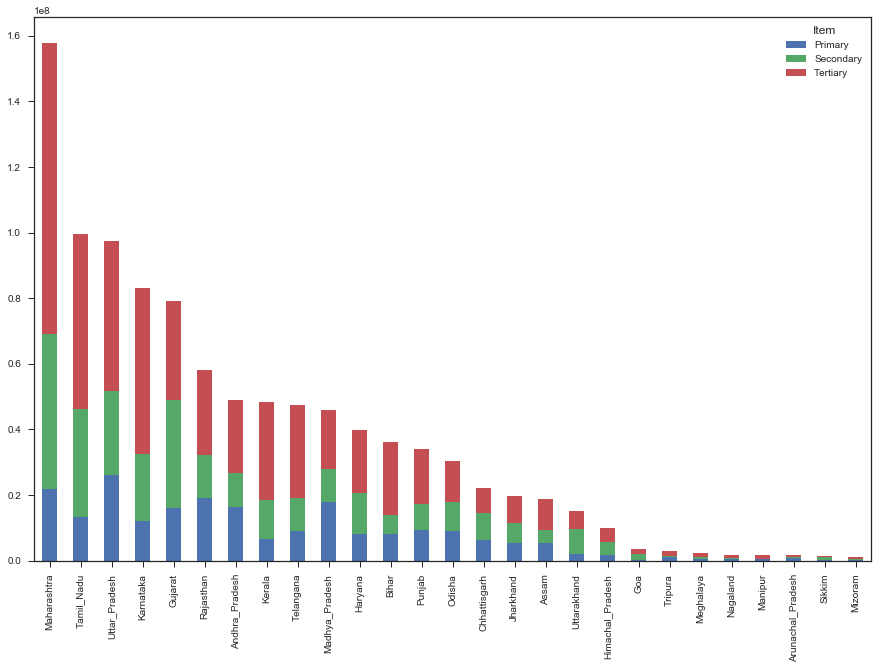

In [229]:
# Plotting just the contribution of the primary, secondary and tertiary sectors to the total GDP for all the states, and sorting the states by the GSVA
f, ax = plt.subplots(1, 1, figsize = (15, 10))
df_main = df_main.sort_values(by="TOTAL GSVA at basic prices", ascending=False)
df_main.loc[:, ["Primary", "Secondary", "Tertiary"]].plot(kind='bar', stacked=True, ax=ax)

In [230]:
# Calculating the percentage of sectors to the main GDP of what is contributed to 
df_main["primary_percentage"]   = ( df_main["Primary"] / (df_main["Primary"] + df_main["Secondary"] + df_main["Tertiary"]) ) * 100
df_main["secondary_percentage"] = ( df_main["Secondary"] / (df_main["Primary"] + df_main["Secondary"] + df_main["Tertiary"]) ) * 100
df_main["tertiary_percentage"]  = ( df_main["Tertiary"] / (df_main["Primary"] + df_main["Secondary"] + df_main["Tertiary"]) ) * 100
df_main.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),primary_percentage,secondary_percentage,tertiary_percentage
Maharashtra,16475655.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,47445207.0,15839100.0,9697246.0,16143324.0,...,88631076.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0,13.785554,30.060067,56.154379
Tamil_Nadu,13064238.0,265536.0,13329774.0,18914794.0,1710379.0,12216718.0,32841892.0,12895842.0,7188320.0,5598498.0,...,53343788.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0,13.394677,33.001801,53.603522
Uttar_Pradesh,25097754.0,901501.0,25999255.0,12261649.0,2030625.0,11256450.0,25548724.0,9437243.0,7404509.0,3392275.0,...,45968959.0,97516938.0,10107396.00,3287219.0,104337115.0,2109940.0,49450.0,26.661271,26.199268,47.139461
Karnataka,11219422.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,20484404.0,8991658.0,5097652.0,4094169.0,...,50490630.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0,14.530479,24.667719,60.801802
Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,4606644.0,...,30220377.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0,20.077045,41.732691,38.190264


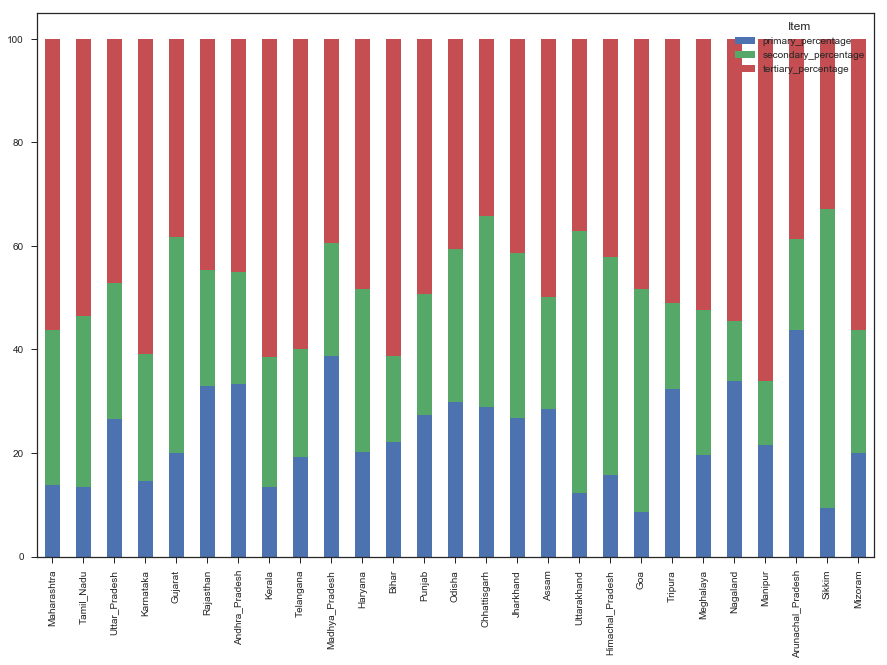

In [231]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))
df_main.loc[:, ["primary_percentage", "secondary_percentage", "tertiary_percentage"]].plot(kind='bar', stacked=True, ax=ax)

In [232]:
# Since plots have been drawn, dropping extra added columns for better analysis 
df_main = df_main.drop(["primary_percentage", "secondary_percentage", "tertiary_percentage"], axis=1)

In [233]:
# Creating quanties, and accordingly categorizing the data
first, second, third, fourth = df_main["Per Capita GSDP (Rs.)"].quantile([0.20,0.5, 0.85, 1])

In [234]:
# Categorising the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest).
def check_category(x):
    if x >= third:
        return "C1"
    elif x >= second and x < third:
        return "C2"
    elif x >= first and x < second:
        return "C3"
    else:
        return "C4"
    
df_main["category"]=df_main["Per Capita GSDP (Rs.)"].apply(check_category)

In [235]:
df_main.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,...,Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),category
Maharashtra,16475655.0,5282727.0,21758383.0,33660294.0,4334702.0,9450211.0,47445207.0,15839100.0,9697246.0,16143324.0,...,5426991.0,10806363.0,88631076.0,157834665.0,25394800.00,4017300.0,179212165.0,1172450.0,152853.0,C2
Tamil_Nadu,13064238.0,265536.0,13329774.0,18914794.0,1710379.0,12216718.0,32841892.0,12895842.0,7188320.0,5598498.0,...,3400800.0,7430115.0,53343788.0,99515453.0,12507325.00,2766405.0,109256373.0,745760.0,146503.0,C2
Uttar_Pradesh,25097754.0,901501.0,25999255.0,12261649.0,2030625.0,11256450.0,25548724.0,9437243.0,7404509.0,3392275.0,...,6152124.0,5034623.0,45968959.0,97516938.0,10107396.00,3287219.0,104337115.0,2109940.0,49450.0,C4
Karnataka,11219422.0,846882.0,12066304.0,12953843.0,1425762.0,6104799.0,20484404.0,8991658.0,5097652.0,4094169.0,...,2232584.0,5308174.0,50490630.0,83041338.0,11026674.00,1889206.0,92178806.0,635100.0,145141.0,C2
Gujarat,13769969.0,2117218.0,15887187.0,24087538.0,3409983.0,5526017.0,33023538.0,10178713.0,4555910.0,4606644.0,...,2576195.0,3123413.0,30220377.0,79131102.0,12353171.04,1981546.0,89502727.0,633590.0,141263.0,C2


In [236]:
# Calculating the correlation of columns
df_main.corr()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,Secondary,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Item,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",1.000000,0.494942,0.987719,0.661087,0.740380,0.851155,0.760536,0.804623,0.872915,0.600907,0.650992,0.922952,0.753549,0.770772,0.844387,0.734186,0.915816,0.829055,0.891394,-0.185447
Mining and quarrying,0.494942,1.000000,0.627019,0.596675,0.658544,0.395761,0.577354,0.511762,0.532827,0.638012,0.473520,0.521359,0.538758,0.551918,0.599825,0.619629,0.622772,0.602516,0.412203,-0.191696
Primary,0.987719,0.627019,1.000000,0.701885,0.783976,0.836852,0.787677,0.815716,0.880529,0.654944,0.670714,0.923162,0.774664,0.792266,0.866786,0.771394,0.934808,0.853509,0.875484,-0.194114
Manufacturing,0.661087,0.596675,0.701885,1.000000,0.956468,0.759436,0.981336,0.870326,0.849857,0.918737,0.823402,0.763845,0.798188,0.888158,0.920388,0.966865,0.803350,0.930547,0.586007,0.170414
"Electricity, gas, water supply & other utility services",0.740380,0.658544,0.783976,0.956468,1.000000,0.724174,0.945325,0.819051,0.824333,0.881115,0.746635,0.789666,0.745631,0.835386,0.896578,0.934056,0.837179,0.904041,0.634739,0.106333
Construction,0.851155,0.395761,0.836852,0.759436,0.724174,1.000000,0.869291,0.916490,0.940933,0.696418,0.794271,0.909450,0.880056,0.885119,0.910636,0.824321,0.892465,0.900825,0.813004,-0.024608
Secondary,0.760536,0.577354,0.787677,0.981336,0.945325,0.869291,1.000000,0.927921,0.921717,0.901412,0.854085,0.851351,0.862133,0.932177,0.966733,0.976049,0.877169,0.971364,0.689474,0.117136
"Trade, repair, hotels and restaurants",0.804623,0.511762,0.815716,0.870326,0.819051,0.916490,0.927921,1.000000,0.953667,0.838061,0.858079,0.877880,0.953866,0.956398,0.963290,0.920417,0.900491,0.960385,0.755235,0.030565
"Transport, storage, communication & services related to broadcasting",0.872915,0.532827,0.880529,0.849857,0.824333,0.940933,0.921717,0.953667,1.000000,0.841133,0.878233,0.937576,0.951201,0.964410,0.978341,0.925162,0.930200,0.973724,0.816703,0.001207


In [237]:
# Analysis of how individual sub category correlates to Per capita GDP
df_main.corr().loc["Per Capita GSDP (Rs.)"]

Item
Agriculture, forestry and fishing                                      -0.185447
Mining and quarrying                                                   -0.191696
Primary                                                                -0.194114
Manufacturing                                                           0.170414
Electricity, gas, water supply & other utility services                 0.106333
Construction                                                           -0.024608
Secondary                                                               0.117136
Trade, repair, hotels and restaurants                                   0.030565
Transport, storage, communication & services related to broadcasting    0.001207
Financial services                                                      0.151297
Real estate, ownership of dwelling & professional services              0.138560
Public administration                                                  -0.145539
Other services         

In [238]:
# Segregating into different data frames based on category for better analysis
df_main_C1 = df_main[df_main["category"] == "C1"].drop(["category", "Primary", "Secondary", "Tertiary", "Gross State Domestic Product", "Taxes on Products", "Subsidies on products", "Per Capita GSDP (Rs.)", "Population ('00)"], axis=1).T
df_main_C2 = df_main[df_main["category"] == "C2"].drop(["category", "Primary", "Secondary", "Tertiary", "Gross State Domestic Product", "Taxes on Products", "Subsidies on products", "Per Capita GSDP (Rs.)", "Population ('00)"], axis=1).T
df_main_C3 = df_main[df_main["category"] == "C3"].drop(["category", "Primary", "Secondary", "Tertiary", "Gross State Domestic Product", "Taxes on Products", "Subsidies on products", "Per Capita GSDP (Rs.)", "Population ('00)"], axis=1).T
df_main_C4 = df_main[df_main["category"] == "C4"].drop(["category", "Primary", "Secondary", "Tertiary", "Gross State Domestic Product", "Taxes on Products", "Subsidies on products", "Per Capita GSDP (Rs.)", "Population ('00)"], axis=1).T

In [239]:
# Aggregating Total GSVA per sector for analysis
df_main_C1["Total_GSVA"] = df_main_C1.sum(axis = 1, skipna=True)
# Calculating the percentage of each sector
df_main_C1["Percentage_of_Sector"] = (df_main_C1["Total_GSVA"] / df_main_C1.loc["TOTAL GSVA at basic prices", "Total_GSVA"])*100
# Dropping the column to avoid cluttering of data
df_main_C1 = df_main_C1.drop("TOTAL GSVA at basic prices")
# Sorting the data based on Percentage of affect on total GSVA
df_main_C1 = df_main_C1.sort_values(by="Percentage_of_Sector", ascending=False)

In [240]:
# Function similar to cumsum to calculate the commulative sum
def find_total_impact(x):
    global old_value
    if old_value is "InitialValue":
        old_value = x
        return x
    else:
        value = x + old_value
        old_value = value
        return value

old_value = "InitialValue"
df_main_C1["total_impact"]=df_main_C1["Percentage_of_Sector"].apply(find_total_impact)
# Assigning a new data frame to the sub sectors which correspond to total 80% of the GSVA
df_main_C1_final = df_main_C1[df_main_C1["total_impact"] <=80]
df_main_C1_final

,Kerala,Haryana,Goa,Sikkim,Total_GSVA,Percentage_of_Sector,total_impact
Item,,,,,,,
"Real estate, ownership of dwelling & professional services",7287633.0,6970183.0,407099.0,75330.0,14740245.0,15.828166,15.828166
"Agriculture, forestry and fishing",5930617.0,8015238.0,308507.0,137447.0,14391809.0,15.454013,31.282179
"Trade, repair, hotels and restaurants",8557345.0,4986319.0,380927.0,70568.0,13995159.0,15.028088,46.310267
Manufacturing,4273567.0,7756921.0,1177608.0,550697.0,13758793.0,14.774277,61.084543
Construction,7314003.0,3702571.0,165819.0,82058.0,11264451.0,12.095837,73.180380


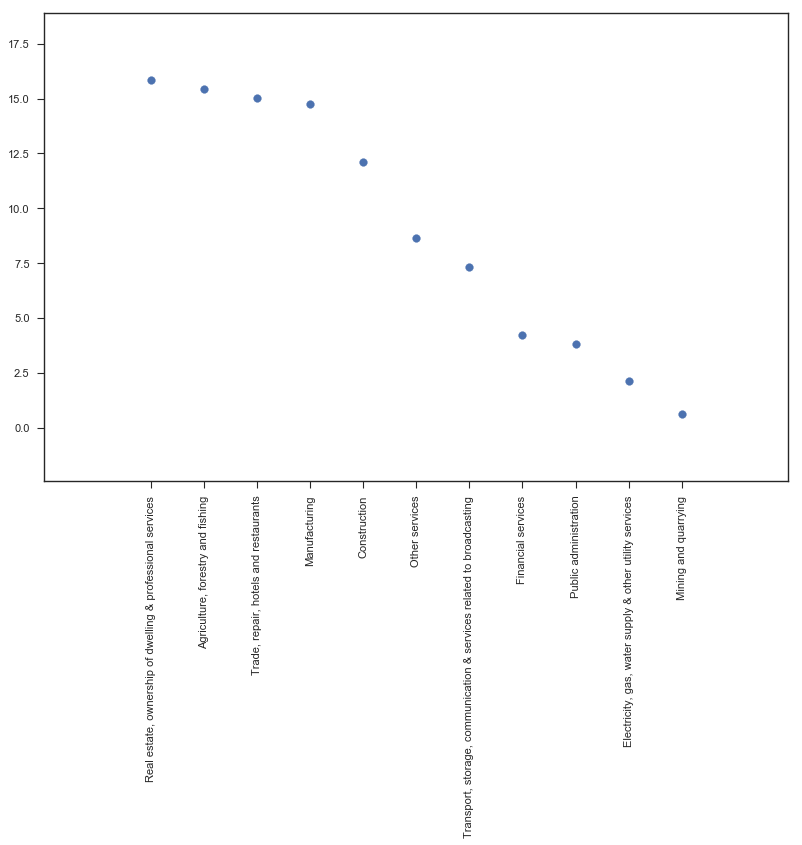

In [241]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(df_main_C1.index, df_main_C1["Percentage_of_Sector"])
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df_main_C1.index, df_main_C1.index, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [242]:
# Aggregating Total GSVA per sector for analysis
df_main_C2["Total_GSVA"] = df_main_C2.sum(axis = 1, skipna=True)
# Calculating the percentage of each sector
df_main_C2["Percentage_of_Sector"] = (df_main_C2["Total_GSVA"] / df_main_C2.loc["TOTAL GSVA at basic prices", "Total_GSVA"])*100
# Dropping the column to avoid cluttering of data
df_main_C2 = df_main_C2.drop("TOTAL GSVA at basic prices")
# Sorting the data based on Percentage of affect on total GSVA
df_main_C2 = df_main_C2.sort_values(by="Percentage_of_Sector", ascending=False)

In [243]:
def find_total_impact(x):
    global old_value
    if old_value is "InitialValue":
        old_value = x
        return x
    else:
        value = x + old_value
        old_value = value
        return value

old_value = "InitialValue"
df_main_C2["total_impact"]=df_main_C2["Percentage_of_Sector"].apply(find_total_impact)
# Assigning a new data frame to the sub sectors which correspond to total 80% of the GSVA
df_main_C2_final = df_main_C2[df_main_C2["total_impact"] <=80]
df_main_C2_final

,Maharashtra,Tamil_Nadu,Karnataka,Gujarat,Andhra_Pradesh,Telangana,Punjab,Uttarakhand,Himachal_Pradesh,Arunachal_Pradesh,Total_GSVA,Percentage_of_Sector,total_impact
Item,,,,,,,,,,,,,
Manufacturing,33660294.0,18914794.0,12953843.0,24087538.0,4672266.0,6353711.0,4790341.0,5866252.0,2543637.0,26120.0,113868796.0,19.758268,19.758268
"Real estate, ownership of dwelling & professional services",30718051.0,16830213.0,24766393.0,5179502.0,4405409.0,9478839.0,3142786.0,831307.0,1125937.0,48418.0,96526855.0,16.749132,36.507399
"Agriculture, forestry and fishing",16475655.0,13064238.0,11219422.0,13769969.0,14819416.0,7591501.0,9285716.0,1601423.0,1514981.0,686117.0,90028438.0,15.621540,52.128940
"Trade, repair, hotels and restaurants",15839100.0,12895842.0,8991658.0,10178713.0,4233400.0,6494607.0,4419919.0,1743106.0,615496.0,60421.0,65472262.0,11.360606,63.489545
Construction,9450211.0,12216718.0,6104799.0,5526017.0,4664889.0,2854024.0,2202962.0,1342733.0,808256.0,147842.0,45318451.0,7.863560,71.353105
Other services,10806363.0,7430115.0,5308174.0,3123413.0,4215389.0,4158229.0,3303041.0,982430.0,923164.0,218728.0,40469046.0,7.022102,78.375207


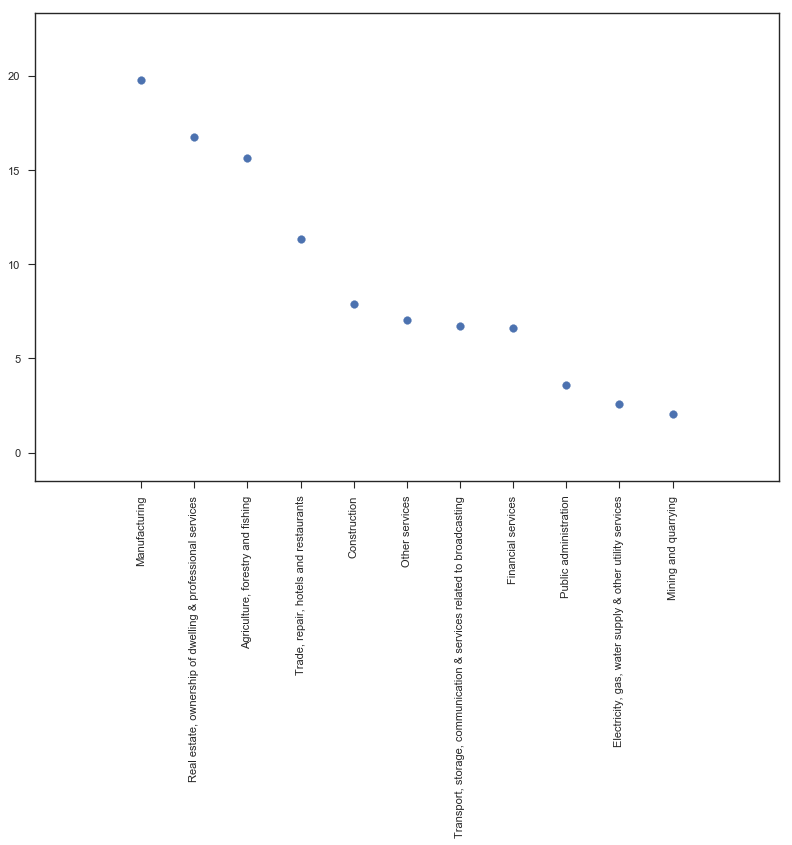

In [244]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(df_main_C2.index, df_main_C2["Percentage_of_Sector"])
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df_main_C2.index, df_main_C2.index, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [245]:
df_main_C3["Total_GSVA"] = df_main_C3.sum(axis = 1, skipna=True)
df_main_C3["Percentage_of_Sector"] = (df_main_C3["Total_GSVA"] / df_main_C3.loc["TOTAL GSVA at basic prices", "Total_GSVA"])*100
df_main_C3 = df_main_C3.drop("TOTAL GSVA at basic prices")
df_main_C3 = df_main_C3.sort_values(by="Percentage_of_Sector", ascending=False)

In [246]:
def find_total_impact(x):
    global old_value
    if old_value is "InitialValue":
        old_value = x
        return x
    else:
        value = x + old_value
        old_value = value
        return value

old_value = "InitialValue"
df_main_C3["total_impact"]=df_main_C3["Percentage_of_Sector"].apply(find_total_impact)
df_main_C3_final = df_main_C3[df_main_C3["total_impact"] <=80]
df_main_C3_final

,Rajasthan,Odisha,Chhattisgarh,Tripura,Meghalaya,Nagaland,Mizoram,Total_GSVA,Percentage_of_Sector,total_impact
Item,,,,,,,,,,
"Agriculture, forestry and fishing",15044394.0,6422978.0,3948847.0,799825.0,366521.0,607897.0,217010.0,27407472.0,23.070676,23.070676
Manufacturing,6552580.0,5754229.0,4370593.0,228625.0,433213.0,18346.0,8479.0,17366065.0,14.618162,37.688837
"Trade, repair, hotels and restaurants",7297290.0,3149555.0,1535571.0,390423.0,383974.0,140781.0,114315.0,13011909.0,10.952981,48.641819
"Real estate, ownership of dwelling & professional services",6451997.0,2348714.0,2462166.0,190704.0,150409.0,159651.0,55068.0,11818709.0,9.948586,58.590405
Construction,5353326.0,2402396.0,2669855.0,177899.0,150256.0,156072.0,133228.0,11043032.0,9.295648,67.886053
Mining and quarrying,4069385.0,2586328.0,2451970.0,142391.0,84529.0,8280.0,8588.0,9351471.0,7.871750,75.757802


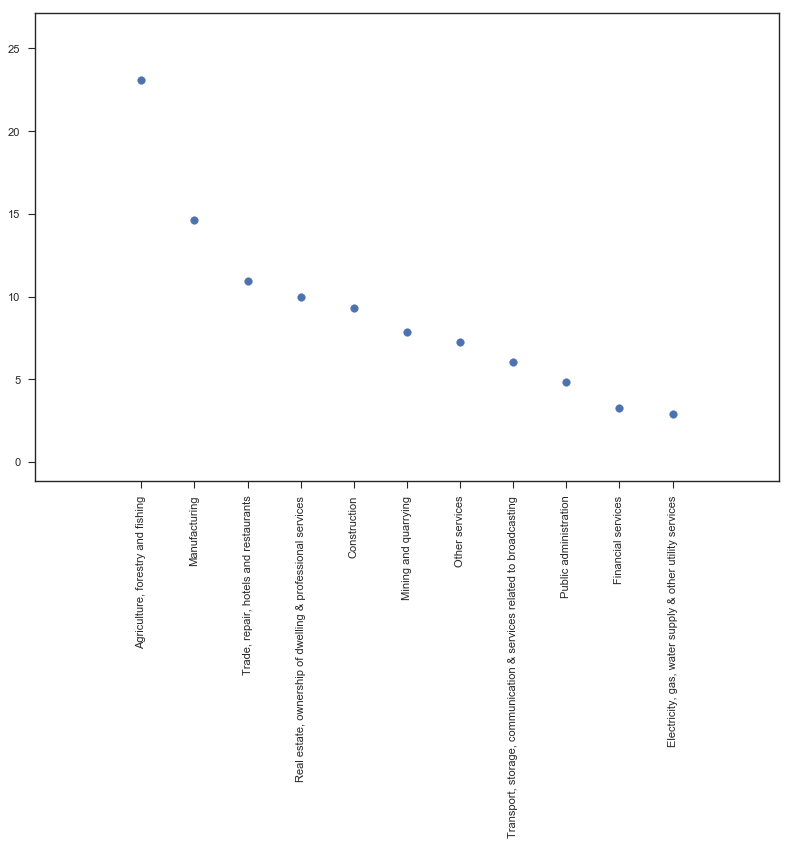

In [247]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(df_main_C3.index, df_main_C3["Percentage_of_Sector"])
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df_main_C3.index, df_main_C3.index, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [248]:
df_main_C4["Total_GSVA"] = df_main_C4.sum(axis = 1, skipna=True)
df_main_C4["Percentage_of_Sector"] = (df_main_C4["Total_GSVA"] / df_main_C4.loc["TOTAL GSVA at basic prices", "Total_GSVA"])*100
df_main_C4 = df_main_C4.drop("TOTAL GSVA at basic prices")
df_main_C4 = df_main_C4.sort_values(by="Percentage_of_Sector", ascending=False)

In [249]:
def find_total_impact(x):
    global old_value
    if old_value is "InitialValue":
        old_value = x
        return x
    else:
        value = x + old_value
        old_value = value
        return value

old_value = "InitialValue"
df_main_C4["total_impact"]=df_main_C4["Percentage_of_Sector"].apply(find_total_impact)
df_main_C4_final = df_main_C4[df_main_C4["total_impact"] <=80]
df_main_C4_final

,Uttar_Pradesh,Madhya_Pradesh,Bihar,Jharkhand,Assam,Manipur,Total_GSVA,Percentage_of_Sector,total_impact
Item,,,,,,,,,
"Agriculture, forestry and fishing",25097754.0,16235647.0,7951890.0,3211065.0,3855548.0,383140.0,56735044.0,25.813440,25.813440
"Trade, repair, hotels and restaurants",9437243.0,5357515.0,7448373.0,1991359.0,2987155.0,262950.0,27484595.0,12.505004,38.318443
Manufacturing,12261649.0,4368833.0,2189965.0,4114148.0,2002936.0,49501.0,24987032.0,11.368657,49.687100
"Real estate, ownership of dwelling & professional services",14548185.0,2660123.0,3740641.0,1656784.0,1412466.0,159335.0,24177534.0,11.000350,60.687450
Construction,11256450.0,4403151.0,3449763.0,1789834.0,1733568.0,143182.0,22775948.0,10.362653,71.050102
"Transport, storage, communication & services related to broadcasting",7404509.0,2865802.0,3147173.0,1470022.0,1194568.0,109726.0,16191800.0,7.366982,78.417084


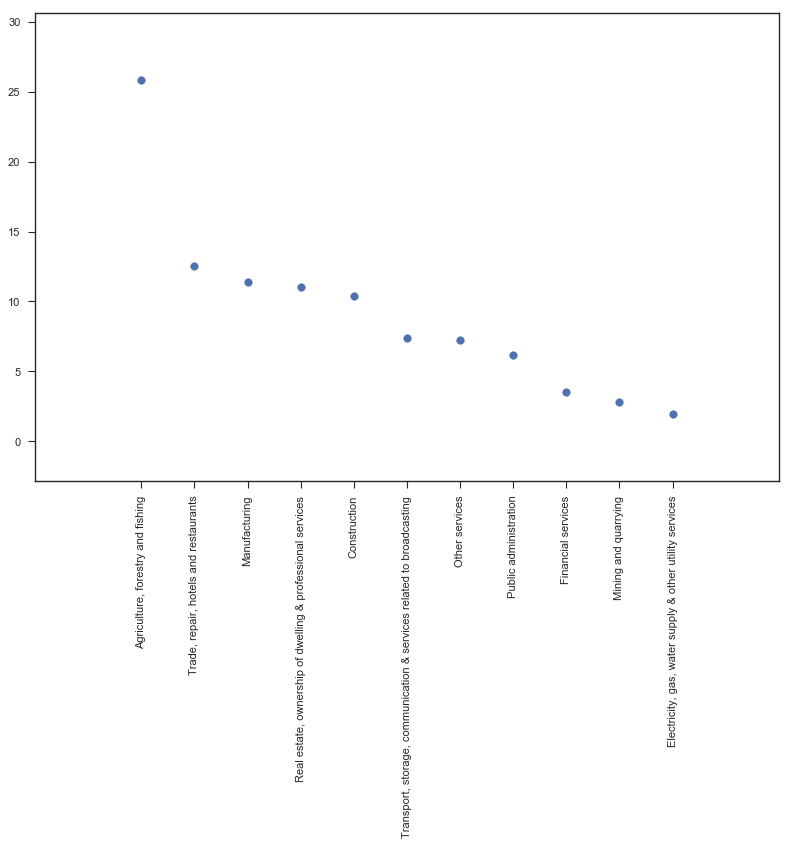

In [250]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor="w", edgecolor="k")
plt.scatter(df_main_C4.index, df_main_C4["Percentage_of_Sector"])
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(df_main_C4.index, df_main_C4.index, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

## End of Part I-A

# Part-II: GDP and Education Dropout Rates

In [251]:
# Reading the data
df_drop_out = pd.read_csv("../GSDP_Assignment/Data_3/rs_session243_au570_1.1.csv")
# Only considering 2014-2015 data
cols = [x for x in df_drop_out.columns if "2014-2015" in x]
# State should be first column
cols.insert(0, "Level of Education - State")
# Only necessary columns are kept, and rest are dropped
df_drop_out = df_drop_out[cols]
df_drop_out=df_drop_out.drop(["Primary - 2014-2015.1", "Senior Secondary - 2014-2015"], axis=1)

# Renaming column name
df_drop_out.columns=df_drop_out.columns.str.replace("Level of Education - ", "")
# Since analysis is for states, removing All India data
df_drop_out=df_drop_out[df_drop_out["State"] != "All India"]

# State is set as index of the data frame
df_drop_out.set_index('State',inplace=True)

# Doing following modifications so that join is successful in pulling in information from another data frame
df_drop_out.index=df_drop_out.index.str.replace(" ", "_")
df_drop_out.index.set_value(df_drop_out.index, 'Chhatisgarh', 'Chhattisgarh')
df_drop_out.index.set_value(df_drop_out.index, 'Uttrakhand', 'Uttarakhand')
df_drop_out.head()

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
State,,,
A_&_N_Islands,1.21,1.69,9.87
Andhra_Pradesh,4.35,5.20,15.71
Arunachal_Pradesh,10.89,6.71,17.11
Assam,7.44,10.51,27.06
Bihar,2.09,4.08,25.90


In [252]:
# Checking the index values of the drop out data frame
df_drop_out.index.values

array(['A_&_N_Islands', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra_&_Nagar_Haveli',
       'Daman_&_Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya_Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu',
       'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand',
       'West_Bengal'], dtype=object)

In [253]:
# Checking the index values of the main data frame
df_main.index.values

array(['Maharashtra', 'Tamil_Nadu', 'Uttar_Pradesh', 'Karnataka',
       'Gujarat', 'Rajasthan', 'Andhra_Pradesh', 'Kerala', 'Telangana',
       'Madhya_Pradesh', 'Haryana', 'Bihar', 'Punjab', 'Odisha',
       'Chhattisgarh', 'Jharkhand', 'Assam', 'Uttarakhand',
       'Himachal_Pradesh', 'Goa', 'Tripura', 'Meghalaya', 'Nagaland',
       'Manipur', 'Arunachal_Pradesh', 'Sikkim', 'Mizoram'], dtype=object)

In [254]:
# Fetching the required columns after doing merging
concat_df=pd.merge(df_drop_out, df_main, how="left", left_index=True, right_index=True)[["Primary - 2014-2015", "Upper Primary - 2014-2015", "Secondary - 2014-2015", "Per Capita GSDP (Rs.)"]]
# Renaming the column names for better analysis
concat_df.columns=concat_df.columns.str.replace(" - 2014-2015", "")
concat_df.head()

,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
State,,,,
A_&_N_Islands,1.21,1.69,9.87,NaN
Andhra_Pradesh,4.35,5.20,15.71,104977.0
Arunachal_Pradesh,10.89,6.71,17.11,112718.0
Assam,7.44,10.51,27.06,60621.0
Bihar,2.09,4.08,25.90,33954.0


In [255]:
# Finding the Correlation between Primary, Upper Primary, Secondary drop out rates on Per Capita GDP
corr_matrix=concat_df.corr()
corr_matrix

,Primary,Upper Primary,Secondary,Per Capita GSDP (Rs.)
Primary,1.000000,0.479300,0.108833,-0.455350
Upper Primary,0.479300,1.000000,0.527291,-0.542732
Secondary,0.108833,0.527291,1.000000,-0.465649
Per Capita GSDP (Rs.),-0.455350,-0.542732,-0.465649,1.000000


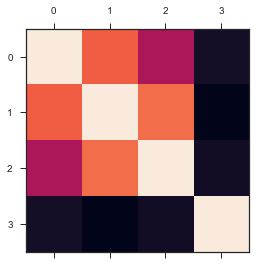

In [256]:
# Visualising the data frame using Matplotlib library
plt.matshow(concat_df.corr())

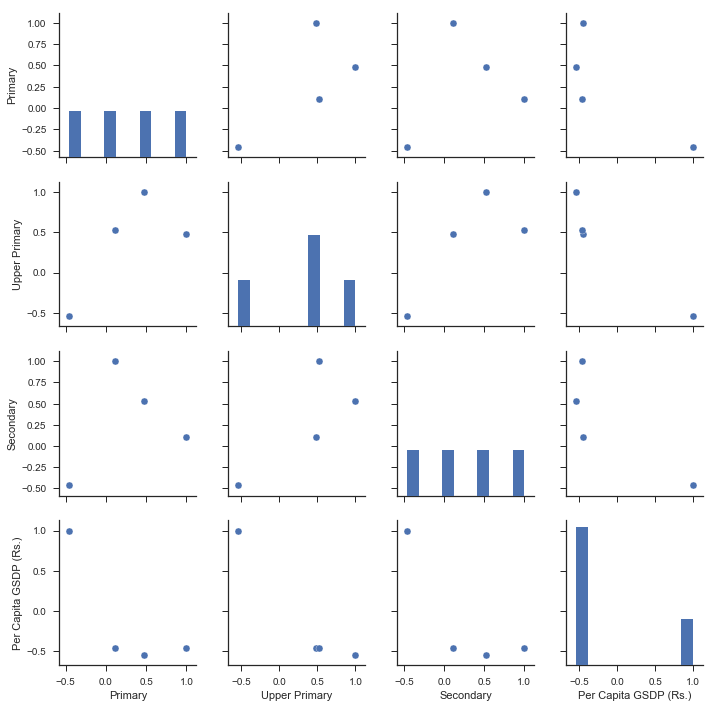

In [257]:
# Visualising the correlations using seaborn plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(corr_matrix)

# End of Part-II